# ***k*-Nearest Neighbors Classification Implementation from Scratch**

*By Carlos Santiago Bañón*

* **Year:** 2020
* **Technologies:** Python, Pandas, NumPy, Matplotlib
* **Areas**: Machine Learning, Classification
* **Keywords:** `classification`, `k-nn`, `k-nn-classification`, `k-nearest-neighbors`, `machine-learning`
* **Description:** This notebook presents an implementation of *k*-nearest neighbors classification from scratch. The data used is a preprocessed version of the Kaggle Titanic dataset hosted in the GitHub repository for this notebook.

## 1. Import Statements
---

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

## 2. Load the Data
---

First, we import the preprocessed Kaggle Titanic dataset hosted in the GitHub repository for this notebook.

In [2]:
# Import the data into Pandas DataFrames.
train_df = pd.read_csv('https://bit.ly/39AQRJj')
test_df = pd.read_csv('https://bit.ly/3aoJzHG')
y_test_df = pd.read_csv('https://bit.ly/2YxfKzi')

In [3]:
# Show the training set.
train_df

,Age,Survived,Pclass,SibSp,Fare,Gender
0,2,0,3,1,0,0
1,3,1,1,1,3,1
2,2,1,3,0,1,1
3,3,1,1,1,3,1
4,3,0,3,0,1,0
...,...,...,...,...,...,...
886,2,0,2,0,1,0
887,2,1,1,0,2,1
888,2,0,3,1,2,1
889,2,1,1,0,2,0


In [4]:
# Show the test set.
test_df

,Age,Pclass,SibSp,Fare,Gender
0,3,3,0,0,0
1,4,3,1,0,1
2,5,2,0,1,0
3,2,3,0,1,0
4,2,3,1,1,1
...,...,...,...,...,...
413,3,3,0,1,0
414,3,1,0,3,1
415,3,3,0,0,0
416,3,3,0,1,0


In [5]:
# Set up the learning matrices.
X_train = train_df.drop('Survived', axis=1, inplace=False).to_numpy()
y_train = train_df[['Survived']].to_numpy()
X_test = test_df.to_numpy()
y_test = y_test_df.drop('PassengerId', axis=1, inplace=False).to_numpy()

## 3. *k*-Nearest Neighbors Classification
---

### 3.1. Define the *k*-NN Model

In [6]:
def knn_distances(X_train, X_test, k):

  """
  Find the k-nearest neighbors of X_test in X_train.
  """
  
  # Calculate the Eucledian distance.
  distances = -2 * X_train @ X_test.T + np.sum(X_test ** 2, axis=1) + np.sum(X_train ** 2, axis=1)[:, np.newaxis]
  distances[distances < 0] = 0
  distances = distances ** .5

  # Get the indices of the sorted items.
  indices = np.argsort(distances, 0)

  # Sort the distances.
  distances = np.sort(distances, 0)

  # Return the top-k distances.
  return indices[0:k, :], distances[0:k, :]

In [7]:
def knn_predictions(X_train, y_train, X_test, k=3):
    
  """
  Use X_train and y_train to predict X_test.
  """

  indices, distances = knn_distances(X_train, X_test, k)
  y_train = y_train.flatten()
  rows, columns = indices.shape
  predictions = list()

  for j in range(columns):

    temp = list()

    for i in range(rows):

      cell = indices[i][j]
      temp.append(y_train[cell])

    # Get the mode value.
    predictions.append(max(temp, key=temp.count))

  predictions = np.array(predictions)

  return predictions

In [8]:
def knn_accuracy(y_test, predictions):

  """
  Evaluate the accuracy of the knn_predictions.
  """

  x = y_test.flatten() == predictions.flatten()
  grade = np.mean(x)

  return np.round(grade * 100, 2)

### 3.2. Run the *k*-NN Model

In [9]:
# Set the max k and accuracies array.
num_k = 35
accuracies = np.empty(num_k)

for i in range(0, num_k):

  # Train and run the KNN model.
  knn_pred = knn_predictions(X_train, y_train, X_test, k = i + 1)

  # Compute the accuracy.
  accuracies[i] = knn_accuracy(y_test, knn_pred)

  # Show the progress.
  print("Training for k =", i + 1, "> Accuracy:", accuracies[i])

Training for k = 1 > Accuracy: 73.44
Training for k = 2 > Accuracy: 73.44
Training for k = 3 > Accuracy: 80.38
Training for k = 4 > Accuracy: 81.34
Training for k = 5 > Accuracy: 84.93
Training for k = 6 > Accuracy: 86.6
Training for k = 7 > Accuracy: 84.93
Training for k = 8 > Accuracy: 83.25
Training for k = 9 > Accuracy: 84.21
Training for k = 10 > Accuracy: 84.45
Training for k = 11 > Accuracy: 86.6
Training for k = 12 > Accuracy: 86.84
Training for k = 13 > Accuracy: 85.89
Training for k = 14 > Accuracy: 85.65
Training for k = 15 > Accuracy: 86.6
Training for k = 16 > Accuracy: 86.12
Training for k = 17 > Accuracy: 85.41
Training for k = 18 > Accuracy: 86.12
Training for k = 19 > Accuracy: 86.36
Training for k = 20 > Accuracy: 86.12
Training for k = 21 > Accuracy: 87.32
Training for k = 22 > Accuracy: 87.56
Training for k = 23 > Accuracy: 86.84
Training for k = 24 > Accuracy: 85.41
Training for k = 25 > Accuracy: 88.28
Training for k = 26 > Accuracy: 85.41
Training for k = 27 > Ac

### 3.3. Show the Accuracy

In [10]:
# Show the accuracies.
print(accuracies)

[73.44 73.44 80.38 81.34 84.93 86.6  84.93 83.25 84.21 84.45 86.6  86.84
 85.89 85.65 86.6  86.12 85.41 86.12 86.36 86.12 87.32 87.56 86.84 85.41
 88.28 85.41 89.71 87.32 88.76 87.32 87.8  84.21 86.36 83.97 89.47]


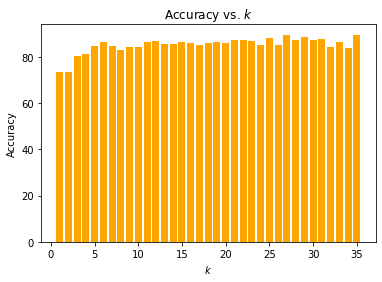

In [11]:
# Plot the accuracies.
fig = plt.figure()
ax = plt.axes()
x = np.linspace(1, num_k, num_k)
ax.bar(x, accuracies, color='orange')

# Set the labels.
plt.title('Accuracy vs. $k$')
plt.xlabel('$k$')
plt.ylabel('Accuracy');

In [12]:
# Get the best k-value.
best_k = np.argmax(accuracies, axis=0)
print("Best k-Value:", best_k + 1)

Best k-Value: 27


In [13]:
print("Accuracy:", accuracies[best_k])

Accuracy: 89.71
